# Trabalho Final para aprovação do curso Sistemas Inteligentes

#### Instruções: 
- Comentem bastante o código, deixe o mais claro possível
- Usem e abusem do Markdown
- Isso ae!

# Pre-Processamento

## Importação de bibliotecas

In [256]:
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk 
import matplotlib.colors
import pandas as pd
import time
import plotly
import plotly.plotly as py
import plotly.tools as tls
from sklearn.model_selection import train_test_split as tts
import warnings
warnings.filterwarnings('ignore')

In [254]:
plotly.tools.set_credentials_file(username='mmilani1', api_key='XF9b6UWhmxCgcKtEzoai')

In [235]:
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [5, 5],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)

## Carregando dataset

In [236]:
#Dataset para treinamento
db = pd.read_csv("bank-additional-dataset/bank-additional-full.csv", sep= ";");

## Informações sobre o dataset

In [237]:
print("Dimensões do dataset", db.shape)

Dimensões do dataset (41188, 21)


In [238]:
print("Features do dataset: ", db.columns)

Features do dataset:  Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


# Descrição das features da base de dados

### Bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### Related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone') 
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### Other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### Social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
    
##### Fonte: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Como podemos observar há 10 features categóricas, é um número significante e teremos que tratá-los num futuro próximo

In [239]:
# Tipos de dados para cada feature
db.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [240]:
# Preview do DataFrame
db.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [241]:
db.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [242]:
# Contando número de valores nulos no dataset
db.isnull().sum(axis = 0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [243]:
#Visualizando valores unicos do dataset
#print("Age: ",db.age.unique())
#print()
#print("Job: ",db.job.unique())
#print()
#print("Maritial: ",db.marital.unique())
#print()
#print("Education: ",db.education.unique())
#print()
#print("Default: ",db.default.unique())
#print()
#print("Housing: ",db.housing.unique())
#print()
#print("loan: ",db.loan.unique())
#print()
#print("Contact: ",db.contact.unique())
#print()
#print("Month : ",db.month.unique())
#print()
#print("Duration: ",db.duration.unique())
#print()
#print("Campaign: ",db.campaign.unique())
#print()
#print("Pdays: ",db.pdays.unique())
#print()
#print("previous: ",db.previous.unique())
#print()
#print("Poutcome: ",db.poutcome.unique())

## Tratamento do dataset por blocos
    - Features relacionadas aos dados pessoais cliente
    - Features relacionadas ao último contato com o cliente
    - Features relacionadas aos dados sociais e economicos do cliente
    - Features restantes

# 1. Pre-Processamento de features relacionadas aos dados pessoais do cliente


In [244]:
# Particionando o Dataset para trabalhar apenas com os dados
# relacionados ao cliente
bank_client = db.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [245]:
#Visualizando as amostras 
print("Age: ",db.age.unique())
print()
print("Job: ",db.job.unique())
print()
print("Maritial: ",db.marital.unique())
print()
print("Education: ",db.education.unique())
print()
print("Default: ",db.default.unique())
print()
print("Housing: ",db.housing.unique())
print()
print("loan: ",db.loan.unique())

Age:  [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44 42
 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67 73 88
 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91 86 98 94
 84 92 89]

Job:  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Maritial:  ['married' 'single' 'divorced' 'unknown']

Education:  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Default:  ['no' 'unknown' 'yes']

Housing:  ['no' 'yes' 'unknown']

loan:  ['no' 'yes' 'unknown']


### Visualização dos Dados

### Distribuição de idades

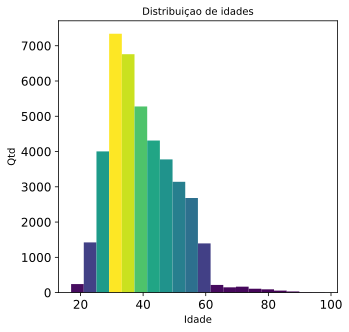

In [248]:
#Deixar Histograma colorido
N, bins, patches = plt.hist(bank_client['age'], bins = 20, orientation = 'vertical')
fracs = N/N.max()
norm = matplotlib.colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
#fim comando para deixar colorido
plt.xlabel('Idade', fontsize =10)
plt.ylabel('Qtd', fontsize =10)
plt.title('Distribuiçao de idades', fontsize =10)
#plt.savefig('age_count_distribuition.png', format='png', dpi =800)
plt.show()

In [225]:
# Funçao de agrupamento dos valores de idade, para diminuir a 
# complexidade do campo (muitos valores)
def ageGrouping(db):
    db.loc[db['age'] <= 32, 'age'] = 1
    db.loc[(db['age'] > 32) & (db['age'] <= 47), 'age'] = 2
    db.loc[(db['age'] > 47) & (db['age'] <= 70), 'age'] = 3
    db.loc[(db['age'] > 70) & (db['age'] <= 98), 'age'] = 4
           
    return db

age(bank_client);

bank_client.head()

,age,job,marital,education,default,housing,loan
0,3,housemaid,married,basic.4y,no,no,no
1,3,services,married,high.school,unknown,no,no
2,2,services,married,high.school,no,yes,no
3,2,admin.,married,basic.6y,no,no,no
4,3,services,married,high.school,no,no,yes


### Distribuição de trabalhos dos clientes

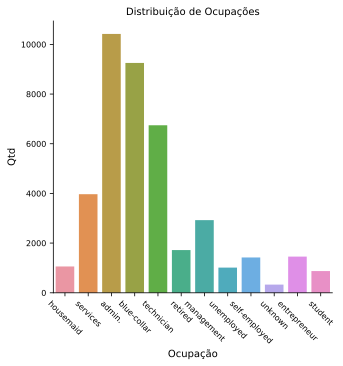

In [229]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Ocupação', fontsize=10)
ax.set_ylabel('Qtd', fontsize=10)
ax.set_title('Distribuição de Ocupações', fontsize=10)
ax.tick_params(labelsize=8)
for tick in ax.get_xticklabels():
    tick.set_rotation(-45)
sns.despine()

### Distribuição estado civil

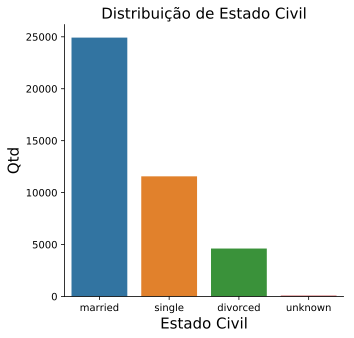

In [227]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Estado Civil', fontsize=15)
ax.set_ylabel('Qtd', fontsize=15)
ax.set_title('Distribuição de Estado Civil', fontsize=15)
ax.tick_params(labelsize=10)
sns.despine()

### Distribuição Escolaridade

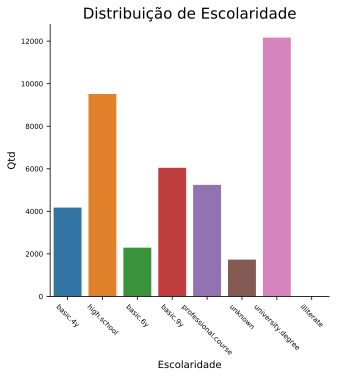

In [228]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Escolaridade', fontsize=10)
ax.set_ylabel('Qtd', fontsize=10)
ax.set_title('Distribuição de Escolaridade', fontsize=15)
ax.tick_params(labelsize=7)
for tick in ax.get_xticklabels():
    tick.set_rotation(-45)
sns.despine()

### Distribuição Housing, Loan e Default

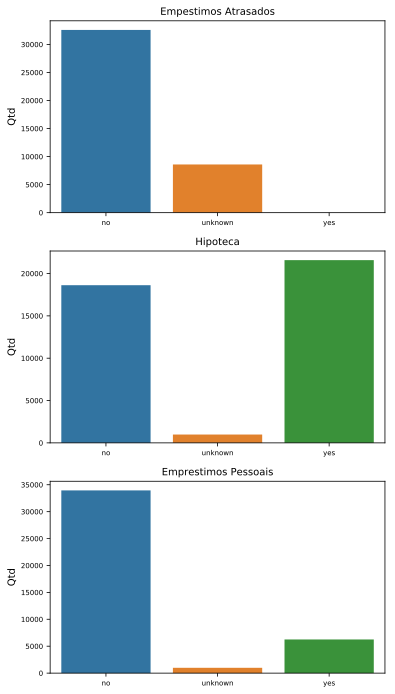

In [266]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (6,12))

sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Empestimos Atrasados', fontsize=10)
ax1.set_xlabel('')
ax1.set_ylabel('Qtd', fontsize=10)
ax1.tick_params(labelsize=7)


sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Hipoteca', fontsize=10)
ax2.set_xlabel('')
ax2.set_ylabel('Qtd', fontsize=10)
ax2.tick_params(labelsize=7)


sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Emprestimos Pessoais', fontsize=10)
ax3.set_xlabel('')
ax3.set_ylabel('Qtd', fontsize=10)
ax3.tick_params(labelsize=7)
plt.subplots_adjust(wspace=0.25)

### Distribuição de escolaridade

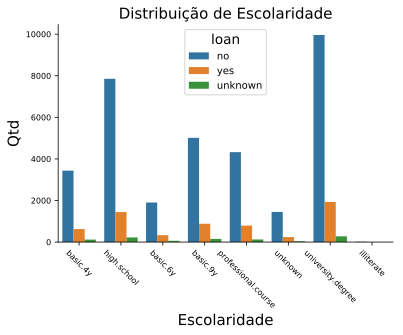

In [196]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
sns.countplot(x = 'education', hue = 'loan', data = bank_client)
ax.set_xlabel('Escolaridade', fontsize=15)
ax.set_ylabel('Qtd', fontsize=15)
ax.set_title('Distribuição de Escolaridade', fontsize=15)
ax.tick_params(labelsize=8)
for tick in ax.get_xticklabels():
    tick.set_rotation(-45)
sns.despine()

### Tratamento com os dados categoricos

In [197]:
#Transformações de dados categoricos para valores numericos
labelencoder_X = LabelEncoder()
bank_client['job'] = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital'] = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education'] = labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default'] = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing'] = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan'] = labelencoder_X.fit_transform(bank_client['loan'] )

In [198]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


## 2. Pre-Processamento de features relacionadas ao ultimo contato com o cliente


In [199]:
# Particionando o Dataset para trabalhar apenas com os
# dados relacionados ao ultimo contato com o cliente
bank_related = db.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [200]:
# Visualizando as amostras do dataset
print("Tipo de contado: ", bank_related.contact.unique())
print()
print("Month : ", bank_related.month.unique())
print()
print("Day of week: ", bank_related.day_of_week.unique())
print()
print("Duration: ", bank_related.duration.unique())
print()


Tipo de contado:  ['telephone' 'cellular']

Month :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Day of week:  ['mon' 'tue' 'wed' 'thu' 'fri']

Duration:  [ 261  149  226 ..., 1246 1556 1868]



### Distribuição contatos, mês e dias da semana


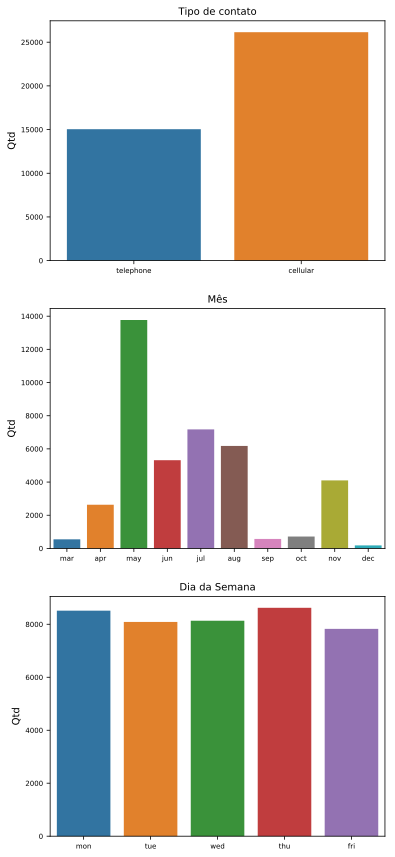

In [201]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (6,15))

sns.countplot(x = 'contact', data = bank_related, ax = ax1, order = ['telephone', 'cellular'])
ax1.set_title('Tipo de contato', fontsize=10)
ax1.set_xlabel('')
ax1.set_ylabel('Qtd', fontsize=10)
ax1.tick_params(labelsize=7)


sns.countplot(x = 'month', data = bank_related, ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct','nov', 'dec']
)
ax2.set_title('Mês', fontsize=10)
ax2.set_xlabel('')
ax2.set_ylabel('Qtd', fontsize=10)
ax2.tick_params(labelsize=7)


sns.countplot(x = 'day_of_week', data = bank_related, ax = ax3, order = ['mon', 'tue', 'wed', 'thu', 'fri'])
ax3.set_title('Dia da Semana', fontsize=10)
ax3.set_xlabel('')
ax3.set_ylabel('Qtd', fontsize=10)
ax3.tick_params(labelsize=7)

plt.subplots_adjust(wspace=0.25)

#['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']


### Distribuição duração vs ocorrência

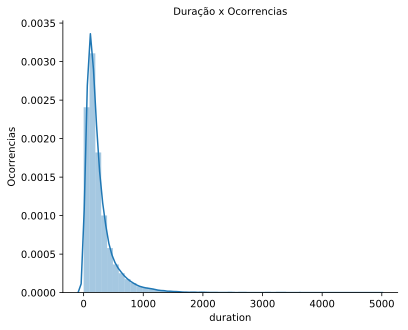

In [231]:
fig, ax2 = plt.subplots()
fig.set_size_inches(6, 5)
ax2.set_xlabel('Duração da ligação', fontsize=10)
ax2.set_ylabel('Ocorrencias', fontsize=10)
ax2.set_title('Duração x Ocorrencias', fontsize=10)
ax2.tick_params(labelsize=10)
sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)

A feature 'duration' possui uma correlação muito grande com o resultado final da ligação. Ligações muito curtas implicam em desenteresse do cliente e, consequentemente, a recusa do serviço oferecido. Por esse motivo, foi decidido não utilizar esta feature nos treinamentos. Ela será retirada na consolidação da base pós tratamento de dados categoricos.

### Tratamento com os dados Categoricos

In [203]:
#Transformações de dados categoricos para valores numericos
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])

bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


## 3. Features relacionadas a situação social e econômica do cliente

In [204]:
# Particionando o Dataset para trabalhar apenas com features relacionadas com a situação
# economica e social do cliente
bank_se = db.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


## 4. Features restantes

In [205]:
bank_o = db.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [206]:
#Visualizando valores categoricos a serem tratados
print("P_Outcome: ", bank_o.poutcome.unique())
print()

P_Outcome:  ['nonexistent' 'failure' 'success']



### Tratamento com dados categoricos

In [207]:
bank_o['poutcome'] = labelencoder_X.fit_transform(bank_o['poutcome'])

bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1


# Validação dos dados 

In [209]:
#Montado o dataset pre-processado
db_pronto= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
db_pronto = db_pronto[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]

#Criando Target
y = pd.get_dummies(db['y'], columns = ['y'], prefix = ['y'], drop_first = True)

#Excluindo a feature duration do dataset
db_pronto = db_pronto.drop('duration', axis=1)


#Confirmando exclusão

print(db_pronto.shape)
print(y.shape)
db_pronto.head()

(41188, 19)
(41188, 1)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,3,3,1,0,0,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
1,3,7,1,3,1,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
2,2,7,1,3,0,2,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
3,2,0,1,1,0,0,0,1,6,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
4,3,7,1,3,0,0,2,1,6,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1


# Treinamento do modelo

In [210]:
# Inicializaçcao e fit do normalizdor, para otimizar o treinamento
sc_X = StandardScaler()
db_pronto = sc_X.fit_transform(db_pronto)
db_pronto

array([[ 1.38823133, -0.20157925, -0.2837415 , ...,  0.1954139 ,
        -0.34949428,  0.19262207],
       [ 1.38823133,  0.91122681, -0.2837415 , ...,  0.1954139 ,
        -0.34949428,  0.19262207],
       [ 0.02907204,  0.91122681, -0.2837415 , ...,  0.1954139 ,
        -0.34949428,  0.19262207],
       ..., 
       [ 1.38823133,  0.35482378, -0.2837415 , ...,  0.1954139 ,
        -0.34949428,  0.19262207],
       [ 0.02907204,  1.46762984, -0.2837415 , ...,  0.1954139 ,
        -0.34949428,  0.19262207],
       [ 2.74739063,  0.35482378, -0.2837415 , ...,  0.1954139 ,
         1.67113606, -2.56309793]])

In [38]:
# Remodelando o vetor target para o treinamento
y_array = np.array(y)

y_array = y_array.reshape(-1)

y_array.shape

(41188,)

In [39]:
#Bibliotecas para validação dos modelos
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold

In [40]:
# Inicializaçcao do cross-validator KFold, fixado com uma seed de aleatoriedade
# Automaticamente misturando a base e segmentando em 10 partes.
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

## 1. KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier as KNN

### Escolhendo K vizinhos para o modelo

k=1 84.92 
k=2 89.07 
k=3 88.37 
k=4 89.36 
k=5 89.19 
k=6 89.56 
k=7 89.43 
k=8 89.69 
k=9 89.57 
k=10 89.69 
k=11 89.67 
k=12 89.76 
k=13 89.73 
k=14 89.80 
k=15 89.70 
k=16 89.81 
k=17 89.77 
k=18 89.84 
k=19 89.84 
Número ótimo de vizinhos é  19 com 89.8%


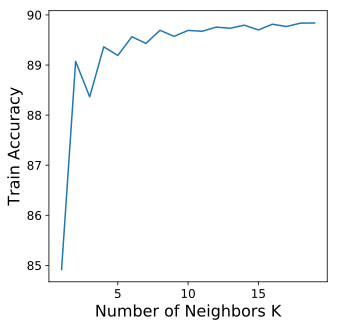

In [40]:
#Procedimento para avaliar um numero otimo de vizinhos para o classificador

neighbors = np.arange(1,20)

#Lista vazia para guardar os resultados
cv_scores = []

#Interação para poder decidir quando vizinhos usar no KNN com 10-fold
for k in neighbors:
    k_value = k
    knn = KNN(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean', n_jobs=4)
    scores = cross_val_score(knn, db_pronto, y_array, cv=kfold, scoring='accuracy', n_jobs=4)
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f " % (k_value, scores.mean()*100))

optimal_k = cv_scores.index(max(cv_scores)) + 1
print ("Número ótimo de vizinhos é  %d com %0.1f%%" % (optimal_k, cv_scores[optimal_k - 1]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [41]:
# Uma vez escolhido k vizinhos vamos validar o modelo com os k vizinhos e obter o tempo de processamento
# para esta validaçao
timerStartKNN = time.time()

knn = KNN(n_neighbors = optimal_k, weights='uniform', p=2, metric='euclidean', n_jobs=4)
scores = cross_validate(estimator=knn, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)

timerStopKNN = time.time()
cpuTimeKNN = timerStopKNN - timerStartKNN

In [42]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores = pd.DataFrame(scores)
scores.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.639013,4.712460,0.898276,0.903423,0.614973,0.672633,0.248918,0.278842,0.354391,0.394247
1,0.610687,4.461540,0.890265,0.903666,0.556757,0.672454,0.217759,0.278858,0.313070,0.394232
2,0.656096,4.675554,0.902161,0.902749,0.636364,0.675741,0.262115,0.266842,0.371295,0.382600
3,0.669079,4.287131,0.896091,0.902857,0.594737,0.670421,0.243534,0.270833,0.345566,0.385809
4,0.721394,5.371149,0.897548,0.903450,0.587065,0.682588,0.258206,0.269902,0.358663,0.386843
5,0.681243,5.031104,0.892692,0.904044,0.664894,0.678154,0.248016,0.266441,0.361272,0.382572
6,0.670677,4.880669,0.905560,0.902479,0.622754,0.680412,0.241860,0.266508,0.348409,0.383001
7,0.674430,4.697327,0.904831,0.902263,0.660920,0.672320,0.256696,0.264790,0.369775,0.379942
8,0.703944,4.964191,0.897523,0.903561,0.623529,0.676869,0.228448,0.275383,0.334385,0.391489
9,0.674490,4.764675,0.898980,0.902832,0.688889,0.670777,0.256198,0.261790,0.373494,0.376601


In [43]:
print("Média Acurácia", round(scores['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores['test_precision'].mean(), 3))
print("Média Recall", round(scores['test_recall'].mean(), 3))
print("Média F1Score", round(scores['test_f1'].mean(), 3))
print("Tempo de CPU %02i:%02i:%02i" % (int(cpuTimeKNN/3600), int(cpuTimeKNN/60), int(cpuTimeKNN%60)))

Média Acurácia 0.898
Média Precisão 0.625
Média Recall 0.246
Média F1Score 0.353
Tempo de CPU 00:06:58


## 2. Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
timerStartDT = time.time()

dtree = DecisionTreeClassifier(criterion='gini') #ou Gini
scores_1 = cross_validate(estimator=dtree, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)

timerStopDT = time.time()
cpuTimeDT = timerStopDT - timerStartDT

In [46]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores_1 = pd.DataFrame(scores_1)
scores_1.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.154033,0.006563,0.845594,0.987807,0.323171,0.995742,0.344156,0.895644,0.333333,0.943044
1,0.123339,0.006325,0.843166,0.987914,0.305618,0.995206,0.287526,0.896808,0.296296,0.943449
2,0.127615,0.005704,0.849964,0.987510,0.325532,0.995211,0.337004,0.893693,0.331169,0.941724
3,0.129473,0.006102,0.839524,0.988184,0.294363,0.995493,0.303879,0.899186,0.299046,0.944892
4,0.131962,0.005873,0.841224,0.987591,0.310212,0.996003,0.352298,0.893617,0.329918,0.942036
5,0.129249,0.005837,0.836611,0.987645,0.328600,0.994089,0.321429,0.894584,0.324975,0.941715
6,0.132945,0.005872,0.846565,0.987941,0.284188,0.995262,0.309302,0.898100,0.296214,0.944188
7,0.128514,0.006139,0.854091,0.987833,0.336188,0.995234,0.350446,0.896708,0.343169,0.943406
8,0.134584,0.006038,0.841428,0.987888,0.305155,0.995480,0.318966,0.896552,0.311907,0.943430
9,0.123591,0.006048,0.842399,0.988265,0.342256,0.995209,0.369835,0.899663,0.355511,0.945027


In [47]:
print("Média Acurácia", round(scores_1['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_1['test_precision'].mean(), 3))
print("Média Recall", round(scores_1['test_recall'].mean(), 3))
print("Média F1Score", round(scores_1['test_f1'].mean(), 3))
print("Tempo de CPU %02i:%02i:%02i" % (int(cpuTimeDT/360), int(cpuTimeDT/60), int(cpuTimeDT%60)))

Média Acurácia 0.844
Média Precisão 0.316
Média Recall 0.329
Média F1Score 0.322
Tempo de CPU 00:00:01


## 3. Artificial Neural Networks

In [48]:
from sklearn.neural_network import MLPClassifier

In [49]:
scores_2_list = []
for i in range(1,21):
    ANN = MLPClassifier(hidden_layer_sizes=(i))
    scores_2_pre = cross_validate(estimator=ANN, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold, n_jobs=4)
    scores_2_list = scores_2_list + (list(pd.DataFrame(scores_2_pre).mean()))

In [50]:
#Para cada hidden layer temos as métricas médias proveniente do K-fold CV
scores_2_list = np.array(scores_2_list)
scores_2_list = scores_2_list.reshape(20,10)
scores_2_list = pd.DataFrame(scores_2_list)
scores_2_list.columns = [['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1']]
scores_2_list

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,2.500136,0.019508,0.894362,0.895169,0.432397,0.443537,0.165908,0.165351,0.239499,0.240770
1,11.009024,0.018241,0.899971,0.900238,0.664324,0.666833,0.227562,0.229488,0.338800,0.341283
2,14.541860,0.025990,0.900602,0.900572,0.669997,0.670456,0.231345,0.231346,0.343644,0.343818
3,12.891711,0.020156,0.899218,0.900535,0.650900,0.666145,0.227513,0.235485,0.336658,0.347703
4,14.161165,0.021600,0.900675,0.900486,0.671170,0.668526,0.232900,0.232045,0.345457,0.344324
5,13.462808,0.017544,0.899412,0.900376,0.655252,0.665692,0.228247,0.233195,0.338049,0.345086
6,12.212720,0.019399,0.900384,0.901530,0.674541,0.688521,0.224915,0.230050,0.336967,0.344756
7,12.567658,0.023383,0.900699,0.901182,0.672802,0.678983,0.233465,0.233471,0.346051,0.347163
8,12.927363,0.028999,0.900359,0.901349,0.666158,0.677171,0.231397,0.237633,0.343326,0.351718
9,12.266497,0.021513,0.900335,0.901250,0.663141,0.675423,0.234623,0.237875,0.346233,0.351698


In [51]:
# Escolha do numero de camadas pelo resultado de maior F-score
nHiddenLayers = scores_2_list['test_f1'].idxmax()
print("Numero ótimo de camadas: %i" % int(nHiddenLayers +1))

Numero ótimo de camadas: 17


In [52]:
# Visualizaçao dos valores das metricas para o numero otimo de camadas escolhido.
scores_2 = scores_2_list.loc[nHiddenLayers]
scores_2

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
16,17.420926,0.019469,0.900942,0.901805,0.667428,0.676312,0.242618,0.246462,0.355478,0.361054


In [53]:
# Treino do modelo, com o numero escolhido de camadas. Obtençcao de metricas de validaçao e
# tempo de processamento
timeStartANN = time.time()

ANN = MLPClassifier(hidden_layer_sizes=nHiddenLayers+1)
scores_2 = cross_validate(estimator=ANN, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)

timeStopANN = time.time()
cpuTimeANN = timeStopANN - timeStartANN

In [54]:
print("Média Acurácia", round(scores_2['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_2['test_precision'].mean(), 3))
print("Média Recall", round(scores_2['test_recall'].mean(), 3))
print("Média F1", round(scores_2['test_f1'].mean(), 3))
print("Tempo de CPU %02i:%02i:%02i" % (int(cpuTimeANN/360), int(cpuTimeANN/60), int(cpuTimeANN%60)))

Média Acurácia 0.9
Média Precisão 0.656
Média Recall 0.241
Média F1 0.352
Tempo de CPU 00:00:41


## 4. Linear Discriminant Analysis (LDA)

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [56]:
# Treino do modelo. Obtençcao de metricas de validaçao e tempo de processamento
timerStartLDA = time.time()

LDA = LinearDiscriminantAnalysis()
scores_3 = cross_validate(estimator=LDA, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)

timerStopLDA = time.time()
cpuTimeLDA = timerStopLDA - timerStartLDA

In [57]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores_3 = pd.DataFrame(scores_3)
scores_3.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.050707,0.007995,0.890750,0.891446,0.518750,0.527113,0.359307,0.358305,0.424552,0.426617
1,0.043881,0.003688,0.880068,0.892120,0.468085,0.529066,0.325581,0.366931,0.384040,0.433329
2,0.039305,0.003766,0.895363,0.890475,0.536050,0.521905,0.376652,0.358576,0.442432,0.425092
3,0.048918,0.008395,0.889779,0.891365,0.515625,0.526372,0.355603,0.356082,0.420918,0.424796
4,0.113494,0.007903,0.890750,0.891338,0.511111,0.527032,0.352298,0.361224,0.417098,0.428652
5,0.039128,0.003734,0.890750,0.891688,0.582317,0.521724,0.378968,0.351306,0.459135,0.419882
6,0.039720,0.004939,0.896820,0.891176,0.508418,0.531095,0.351163,0.357007,0.415406,0.426989
7,0.040434,0.004489,0.895606,0.891338,0.529605,0.529539,0.359375,0.350668,0.428191,0.421929
8,0.039778,0.005101,0.887081,0.891098,0.498442,0.523826,0.344828,0.365900,0.407643,0.430847
9,0.052943,0.006001,0.893152,0.891772,0.569620,0.525623,0.371901,0.355390,0.450000,0.424060


In [58]:
print("Média Acurácia", round(scores_3['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_3['test_precision'].mean(), 3))
print("Média Recall", round(scores_3['test_recall'].mean(), 3))
print("Média Recall", round(scores_3['test_f1'].mean(), 3))
print("Tempo de CPU %02i:%02i:%02i:%i" % (int(cpuTimeLDA/360), int(cpuTimeLDA/60), int(cpuTimeLDA%60), (cpuTimeLDA*1000)))

Média Acurácia 0.891
Média Precisão 0.524
Média Recall 0.358
Média Recall 0.425
Tempo de CPU 00:00:00:838


## 5. Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
# Treino do modelo. Obtençcao de metricas de validaçao e tempo de processamento
timerStartLR = time.time()
logmodel = LogisticRegression() 
scores_4 = cross_validate(estimator=logmodel, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)
timerStopLR = time.time()
cpuTimeLR = timerStopLR - timerStartLR

In [61]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores_4 = pd.DataFrame(scores_4)
scores_4.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.186521,0.003904,0.899247,0.900591,0.640719,0.682728,0.231602,0.220440,0.340223,0.333273
1,0.161852,0.004470,0.893178,0.900888,0.613793,0.679012,0.188161,0.224382,0.288026,0.337302
2,0.164674,0.003681,0.906045,0.899593,0.710692,0.673913,0.248899,0.214763,0.368679,0.325725
3,0.161970,0.003794,0.899247,0.900213,0.654088,0.674982,0.224138,0.220307,0.333868,0.332190
4,0.160049,0.003609,0.900947,0.900105,0.660131,0.675695,0.221007,0.220655,0.331148,0.332673
5,0.163227,0.005580,0.893421,0.900915,0.704403,0.672375,0.222222,0.218327,0.337858,0.329622
6,0.163126,0.003681,0.904831,0.899701,0.630137,0.678003,0.213953,0.222565,0.319444,0.335122
7,0.159923,0.003585,0.907502,0.899242,0.731034,0.670395,0.236607,0.214456,0.357504,0.324959
8,0.160315,0.003603,0.899223,0.900135,0.684211,0.670749,0.196121,0.222941,0.304858,0.334651
9,0.166208,0.003627,0.898252,0.900486,0.712418,0.673864,0.225207,0.217757,0.342229,0.329151


In [62]:
print("Média Acurácia", round(scores_4['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_4['test_precision'].mean(), 3))
print("Média Recall", round(scores_4['test_recall'].mean(), 3))
print("Média Recall", round(scores_4['test_f1'].mean(), 3))
print("Tempo de CPU %02i:%02i:%02i" % (int(cpuTimeLR/360), int(cpuTimeLR/60), int(cpuTimeLR%60)))

Média Acurácia 0.9
Média Precisão 0.674
Média Recall 0.221
Média Recall 0.332
Tempo de CPU 00:00:01


## 6. Support Vector Machine (SVM)

In [63]:
from sklearn.svm import LinearSVC

In [64]:
# Treino do modelo. Obtençcao de metricas de validaçao e tempo de processamento
timerStartSVM = time.time()

SVM = LinearSVC()
scores_5 = cross_validate(estimator=SVM, X=db_pronto, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold, n_jobs=4)

timerStopSVM = time.time()
cpuTimeSVM = timerStopSVM - timerStartSVM

In [65]:
#Visualizando as métricas para cada K-fold do treinamento. 
scores_5 = pd.DataFrame(scores_5)
scores_5.head(10)
#Temos as métricas Acurácias, precisão, recall e f1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,10.921683,0.027014,0.899490,0.900186,0.664384,0.697521,0.209957,0.202011,0.319079,0.313289
1,11.525666,0.021285,0.893421,0.900753,0.626866,0.698697,0.177590,0.205904,0.276771,0.318072
2,11.317102,0.023686,0.905802,0.899188,0.735714,0.689451,0.226872,0.195174,0.346801,0.304226
3,11.804878,0.026540,0.898519,0.900348,0.657534,0.698191,0.206897,0.203305,0.314754,0.314911
4,11.275564,0.058401,0.899247,0.899916,0.650000,0.696266,0.199125,0.200574,0.304858,0.311433
5,11.518098,0.032620,0.892207,0.900807,0.702703,0.692050,0.206349,0.199952,0.319018,0.310261
6,11.565937,0.034517,0.904831,0.899647,0.655738,0.696629,0.186047,0.206176,0.289855,0.318182
7,11.510102,0.003953,0.906045,0.899080,0.756303,0.687760,0.200893,0.197042,0.317460,0.306323
8,8.513238,0.003931,0.900680,0.900162,0.735043,0.691070,0.185345,0.205699,0.296041,0.317033
9,8.198117,0.004078,0.897766,0.900135,0.740458,0.689167,0.200413,0.198989,0.315447,0.308813


In [67]:
print("Média Acurácia", round(scores_5['test_accuracy'].mean(), 3))
print("Média Precisão", round(scores_5['test_precision'].mean(), 3))
print("Média Recall", round(scores_5['test_recall'].mean(), 3))
print("Média Recall", round(scores_5['test_f1'].mean(), 3))
print("Tempo de CPU %02i:%02i:%02i" % (int(cpuTimeSVM/360), int(cpuTimeSVM/60), int(cpuTimeSVM%60)))

Média Acurácia 0.9
Média Precisão 0.692
Média Recall 0.2
Média Recall 0.31
Tempo de CPU 00:00:31


# PCA - Testes com redução de dimensionalidade

### LDA

In [69]:
# Iteraçao para avaliar os resultados das metricas de prediçao quando utlizando um metodo de reducao de dimensionalidade
# neste caso, PCA.
def PCAtestingLDA(n_comp):
    scores_PCA_list = []
    for i in range(1,n_comp):
        pca = PCA(n_components=i, random_state=42)
        db_PCA = pca.fit_transform(db_pronto)
        scores_PCA = cross_validate(estimator=LDA, X=db_PCA, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)
        scores_PCA_list = scores_PCA_list + (list(pd.DataFrame(scores_PCA).mean()))
    return scores_PCA_list

scores_PCA_LDA = PCAtestingLDA(20)

In [70]:
scores_PCA_LDA = np.array(scores_PCA_LDA)
scores_PCA_LDA = scores_PCA_LDA.reshape(19,10)
scores_PCA_LDA = pd.DataFrame(scores_PCA_LDA)
scores_PCA_LDA.columns = [['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1']]

In [87]:
scores_PCA_LDA

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.004741,0.003302,0.889142,0.889097,0.590926,0.586396,0.052828,0.052651,0.096826,0.096592
1,0.008225,0.003373,0.896402,0.896410,0.616220,0.616354,0.213219,0.213097,0.316550,0.316696
2,0.009114,0.003402,0.896985,0.896949,0.627350,0.626681,0.210618,0.210846,0.315127,0.315529
3,0.010328,0.003513,0.897252,0.897244,0.632811,0.632730,0.209336,0.209409,0.314364,0.314671
4,0.011540,0.003558,0.897324,0.897333,0.634450,0.634537,0.208899,0.209050,0.314082,0.314487
5,0.012160,0.003437,0.897397,0.897411,0.636052,0.636239,0.208451,0.208619,0.313759,0.314207
6,0.018225,0.011147,0.897422,0.897424,0.636448,0.636428,0.208451,0.208666,0.313809,0.314284
7,0.014885,0.003574,0.897446,0.897424,0.637066,0.636649,0.208235,0.208403,0.313645,0.314013
8,0.018077,0.003849,0.897422,0.897422,0.636634,0.636603,0.208235,0.208403,0.313592,0.314007
9,0.017322,0.003570,0.897422,0.897422,0.636634,0.636603,0.208235,0.208403,0.313592,0.314007


In [72]:
# Plot utilizando Plotly. Grafico editado e armazenado na nuvem.

fig = py.get_figure('https://plot.ly/~mmilani1/56/f-score-lda-x-numero-de-componentes-pca/')
py.iplot(fig)

### Logistic Regression

In [82]:
def PCAtestingLR(n_comp):
    scores_PCA_list = []
    for i in range(1,n_comp):
        pca = PCA(n_components=i, random_state=42)
        db_PCA = pca.fit_transform(db_pronto)
        scores_PCA = cross_validate(estimator=logmodel, X=db_PCA, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)
        scores_PCA_list = scores_PCA_list + (list(pd.DataFrame(scores_PCA).mean()))
    return scores_PCA_list

scores_PCA_LR = PCAtestingLR(20)

In [83]:
scores_PCA_LR = np.array(scores_PCA_LR)
scores_PCA_LR = scores_PCA_LR.reshape(19,10)
scores_PCA_LR = pd.DataFrame(scores_PCA_LR)
scores_PCA_LR.columns = [['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1']]

In [86]:
scores_PCA_LR

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.034692,0.003531,0.888025,0.887966,0.603750,0.588980,0.018733,0.018221,0.036239,0.035345
1,0.040955,0.003688,0.897980,0.898002,0.648217,0.648668,0.205825,0.206343,0.312297,0.313089
2,0.037973,0.003551,0.898296,0.898263,0.653541,0.653185,0.206538,0.206607,0.313710,0.313917
3,0.048742,0.004372,0.898223,0.898190,0.653464,0.652872,0.205446,0.205553,0.312421,0.312663
4,0.044202,0.003596,0.898320,0.898344,0.656034,0.656026,0.204825,0.205242,0.311980,0.312662
5,0.046749,0.003706,0.898344,0.898360,0.660075,0.659820,0.201397,0.201817,0.308384,0.309090
6,0.048002,0.003566,0.898174,0.898234,0.657635,0.658390,0.200536,0.200860,0.307106,0.307810
7,0.051062,0.003586,0.898174,0.898134,0.660163,0.659391,0.197922,0.198058,0.304290,0.304615
8,0.053420,0.003574,0.898101,0.898174,0.658931,0.660086,0.197706,0.198153,0.303934,0.304802
9,0.057349,0.003558,0.898150,0.898182,0.659605,0.660272,0.197925,0.198129,0.304268,0.304794


In [490]:
# Plot utilizando Plotly. Grafico editado e armazenado na nuvem.

fig = py.get_figure('https://plot.ly/~mmilani1/74/f-score-lda-x-numero-de-componentes-pca/')
py.iplot(fig)

### SVM

In [96]:
def PCAtestingSVM(n_comp):
    scores_PCA_list = []
    for i in range(1,n_comp):
        pca = PCA(n_components=i, random_state=42)
        db_PCA = pca.fit_transform(db_pronto)
        scores_PCA = cross_validate(estimator=SVM, X=db_PCA, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold, n_jobs=4)
        scores_PCA_list = scores_PCA_list + (list(pd.DataFrame(scores_PCA).mean()))
    return scores_PCA_list

In [97]:
scores_PCA_SVM = PCAtestingSVM(20)

In [102]:
scores_PCA_SVM = np.array(scores_PCA_SVM)
scores_PCA_SVM = scores_PCA_SVM.reshape(19,10)
scores_PCA_SVM = pd.DataFrame(scores_PCA_SVM)
scores_PCA_SVM.columns = [['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1']]

In [104]:
scores_PCA_SVM

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,4.003903,0.024722,0.887346,0.887346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.836589,0.005203,0.898271,0.898242,0.654756,0.654614,0.204770,0.204738,0.311816,0.311917
2,4.723421,0.010955,0.898126,0.898042,0.651287,0.649897,0.205662,0.205817,0.312434,0.312626
3,4.989231,0.023475,0.897810,0.897764,0.645373,0.644769,0.206106,0.205937,0.312209,0.312166
4,5.206839,0.029411,0.897737,0.897718,0.643855,0.643543,0.206323,0.206392,0.312261,0.312543
5,5.656428,0.017936,0.897640,0.897621,0.643628,0.643329,0.204819,0.204691,0.310490,0.310565
6,5.588982,0.022957,0.897640,0.897627,0.643502,0.643533,0.204811,0.204571,0.310480,0.310451
7,6.026379,0.028704,0.897640,0.897672,0.644428,0.645019,0.203709,0.203853,0.309330,0.309795
8,7.087492,0.024659,0.897591,0.897656,0.643622,0.644772,0.203709,0.203805,0.309220,0.309710
9,6.436797,0.024859,0.897591,0.897670,0.643622,0.644927,0.203709,0.203901,0.309220,0.309839


In [105]:
# Plot utilizando Plotly. Grafico editado e armazenado na nuvem.

fig = py.get_figure('https://plot.ly/~mmilani1/80/f-score-svm-x-numero-de-componentes-pca/')
py.iplot(fig)

### Decision Tree

In [99]:
def PCAtestingDT(n_comp):
    scores_PCA_list = []
    for i in range(1,n_comp):
        pca = PCA(n_components=i, random_state=42)
        db_PCA = pca.fit_transform(db_pronto)
        scores_PCA = cross_validate(estimator=dtree, X=db_PCA, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold, n_jobs=4)
        scores_PCA_list = scores_PCA_list + (list(pd.DataFrame(scores_PCA).mean()))
    return scores_PCA_list

In [100]:
scores_PCA_DT = PCAtestingDT(20)

In [106]:
scores_PCA_DT = np.array(scores_PCA_DT)
scores_PCA_DT = scores_PCA_DT.reshape(19,10)
scores_PCA_DT = pd.DataFrame(scores_PCA_DT)
scores_PCA_DT.columns = [['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1']]

In [107]:
scores_PCA_DT

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.119300,0.009360,0.837550,0.987491,0.253455,0.995276,0.227431,0.893200,0.239564,0.941478
1,0.176439,0.006574,0.847698,0.987858,0.312875,0.995293,0.294647,0.896455,0.303373,0.943291
2,0.234398,0.007268,0.846557,0.987858,0.313313,0.995293,0.303898,0.896455,0.308295,0.943291
3,0.313226,0.006708,0.846071,0.987858,0.310976,0.995293,0.302028,0.896455,0.306221,0.943291
4,0.385737,0.006784,0.846994,0.987858,0.315122,0.995293,0.304627,0.896455,0.309387,0.943291
5,0.467727,0.006846,0.847334,0.987858,0.315008,0.995293,0.302135,0.896455,0.308065,0.943291
6,0.541097,0.007028,0.846242,0.987858,0.311228,0.995293,0.301435,0.896455,0.306058,0.943291
7,0.630986,0.007146,0.847893,0.987858,0.318229,0.995293,0.305636,0.896455,0.311519,0.943291
8,0.788023,0.007430,0.845829,0.987858,0.311285,0.995293,0.303156,0.896455,0.306870,0.943291
9,1.022458,0.007707,0.843959,0.987858,0.306888,0.995293,0.305561,0.896455,0.305958,0.943291


In [492]:
# Plot utilizando Plotly. Grafico editado e armazenado na nuvem.

fig = py.get_figure('https://plot.ly/~mmilani1/90/f-score-svm-x-numero-de-componentes-pca/')
py.iplot(fig)

### KNN

In [503]:
def PCAtestingKNN(n_comp):
    scores_PCA_list = []
    for i in range(1,n_comp):
        pca = PCA(n_components=i, random_state=42)
        db_PCA = pca.fit_transform(db_pronto)
        scores_PCA = cross_validate(estimator=knn, X=db_PCA, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold)
        scores_PCA_list = scores_PCA_list + (list(pd.DataFrame(scores_PCA).mean()))
    return scores_PCA_list

In [504]:
scores_PCA_KNN = PCAtestingKNN(20)

In [505]:
scores_PCA_KNN = np.array(scores_PCA_KNN)
scores_PCA_KNN = scores_PCA_KNN.reshape(19,10)
scores_PCA_KNN = pd.DataFrame(scores_PCA_KNN)
scores_PCA_KNN.columns = [['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1']]

In [506]:
scores_PCA_KNN

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.041439,0.425769,0.887928,0.892202,0.513022,0.597055,0.114668,0.132681,0.187256,0.217079
1,0.019097,0.425565,0.897106,0.901708,0.612942,0.665427,0.234520,0.256391,0.339043,0.370125
2,0.016462,0.425808,0.896815,0.902205,0.612500,0.673341,0.230594,0.256171,0.334681,0.371104
3,0.016861,0.424447,0.897203,0.902911,0.613713,0.676995,0.237793,0.264242,0.342318,0.380101
4,0.018444,0.425355,0.896013,0.902142,0.603726,0.670517,0.225242,0.258235,0.327794,0.372860
5,0.019874,0.425781,0.897859,0.902269,0.633965,0.683963,0.222983,0.246312,0.329711,0.362181
6,0.021137,0.537491,0.897227,0.901198,0.628339,0.678086,0.215151,0.234095,0.320439,0.348032
7,0.022081,0.521578,0.897057,0.901330,0.629851,0.684738,0.209077,0.230053,0.313825,0.344391
8,0.023442,0.826510,0.896693,0.901072,0.625643,0.683396,0.207038,0.227005,0.311043,0.340789
9,0.024968,0.927496,0.896887,0.900804,0.629139,0.679555,0.206518,0.226054,0.310889,0.339249


In [264]:
# Plot utilizando Plotly. Grafico editado e armazenado na nuvem.

fig = py.get_figure('https://plot.ly/~mmilani1/100/f-score-ann-x-numero-de-componentes-pca/')
py.iplot(fig)

### ANN

In [493]:
def PCAtestingANN(n_comp):
    scores_PCA_list = []
    for i in range(1,n_comp):
        pca = PCA(n_components=i, random_state=42)
        db_PCA = pca.fit_transform(db_pronto)
        scores_PCA = cross_validate(estimator=ANN, X=db_PCA, y = y_array, scoring=['accuracy', 'precision','recall','f1'], cv=kfold, n_jobs=4)
        scores_PCA_list = scores_PCA_list + (list(pd.DataFrame(scores_PCA).mean()))
    return scores_PCA_list

In [494]:
scores_PCA_ANN = PCAtestingANN(20)

In [495]:
scores_PCA_ANN = np.array(scores_PCA_ANN)
scores_PCA_ANN = scores_PCA_ANN.reshape(19,10)
scores_PCA_ANN = pd.DataFrame(scores_PCA_ANN)
scores_PCA_ANN.columns = [['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1']]

In [497]:
scores_PCA_ANN

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,5.985341,0.016155,0.889458,0.889642,0.591478,0.593463,0.061475,0.064260,0.111136,0.115584
1,7.998372,0.018284,0.897980,0.898077,0.648962,0.650252,0.205611,0.206157,0.312102,0.313051
2,8.537914,0.017736,0.897980,0.898039,0.648589,0.649666,0.205507,0.206056,0.311974,0.312861
3,9.111214,0.019376,0.897737,0.898004,0.643409,0.647999,0.206446,0.207186,0.312436,0.313965
4,8.703642,0.020116,0.897446,0.898066,0.645083,0.653579,0.198530,0.202586,0.303414,0.309280
5,8.608158,0.020346,0.897907,0.897956,0.658181,0.656020,0.195962,0.198060,0.301688,0.304232
6,9.818814,0.016205,0.898004,0.898158,0.650584,0.653146,0.204787,0.204724,0.311233,0.311713
7,9.839104,0.017504,0.897494,0.897929,0.641332,0.649380,0.204432,0.204388,0.309681,0.310848
8,10.899263,0.020111,0.897761,0.898093,0.648016,0.651745,0.203433,0.205161,0.309242,0.311942
9,11.366382,0.018649,0.897591,0.898207,0.647587,0.656452,0.199475,0.202502,0.304771,0.309467


In [500]:
# Plot utilizando Plotly. Grafico editado e armazenado na nuvem.

fig = py.get_figure('https://plot.ly/~mmilani1/94/f-score-decisiontree-x-numero-de-componentes-pca/')
py.iplot(fig)

# Resultados e Metricas 

In [ ]:
#print("Acuraria média KNN: %.5f" % scores['test_accuracy'].mean())
#print("Acuraria média DecisionTree: %.5f" % scores_1['test_accuracy'].mean())
#print("Acuraria média ANN: %.5f" % scores_2['test_accuracy'].mean())
#print("Acuraria média LDA: %.5f" % scores_3['test_accuracy'].mean())
#print("Acuraria média LogReg: %.5f" % scores_4['test_accuracy'].mean())
#print("Acuraria média SVM: %.5f" % scores_5['test_accuracy'].mean())

### Acurácia

In [73]:
#Comparação dos modelos - Acurácia
modelos = pd.DataFrame({
                'Models': ['K-Near Neighbors', 'Decision Tree', 'Artificial Neural Networks',
                           'Linear Discriminant Analysis (LDA)', 'Logistic Regression', 'Support Vector Machine'],
                'Score':  [scores['test_accuracy'].mean(), scores_1['test_accuracy'].mean(), scores_2['test_accuracy'].mean(), scores_3['test_accuracy'].mean(), scores_4['test_accuracy'].mean(), scores_5['test_accuracy'].mean()]})

modelos.sort_values(by='Score', ascending=False)

,Models,Score
2,Artificial Neural Networks,0.900189
4,Logistic Regression,0.900189
5,Support Vector Machine,0.899801
0,K-Near Neighbors,0.898393
3,Linear Discriminant Analysis (LDA),0.891012
1,Decision Tree,0.844056


In [263]:
# Plot utilizando Plotly. Grafico editado e armazenado na nuvem.

fig = py.get_figure('https://plot.ly/~mmilani1/58/acuracia-de-teste-por-modelo/')
py.iplot(fig)

### Recall

In [75]:
#Comparação dos modelos - Recall
modelos = pd.DataFrame({
                'Models': ['K-Near Neighbors', 'Decision Tree', 'Artificial Neural Networks',
                           'Linear Discriminant Analysis (LDA)', 'Logistic Regression', 'Support Vector Machine'],
                'Score':  [scores['test_recall'].mean(), scores_1['test_recall'].mean(), scores_2['test_recall'].mean(), scores_3['test_recall'].mean(), scores_4['test_recall'].mean(), scores_5['test_recall'].mean()]})

modelos.sort_values(by='Score', ascending=False)

,Models,Score
3,Linear Discriminant Analysis (LDA),0.357568
1,Decision Tree,0.329484
0,K-Near Neighbors,0.246175
2,Artificial Neural Networks,0.241166
4,Logistic Regression,0.220792
5,Support Vector Machine,0.199949


In [262]:
# Plot utilizando Plotly. Grafico editado e armazenado na nuvem.

fig = py.get_figure('https://plot.ly/~mmilani1/60/recall-de-teste-por-modelo/')
py.iplot(fig)

### Precisão

In [77]:
#Comparação dos modelos - Precisão
modelos = pd.DataFrame({
                'Models': ['K-Near Neighbors', 'Decision Tree', 'Artificial Neural Networks',
                           'Linear Discriminant Analysis (LDA)', 'Logistic Regression', 'Support Vector Machine'],
                'Score':  [scores['test_precision'].mean(), scores_1['test_precision'].mean(), scores_2['test_precision'].mean(), scores_3['test_precision'].mean(), scores_4['test_precision'].mean(), scores_5['test_precision'].mean()]})

modelos.sort_values(by='Score', ascending=False)

,Models,Score
5,Support Vector Machine,0.692474
4,Logistic Regression,0.674163
2,Artificial Neural Networks,0.655529
0,K-Near Neighbors,0.625088
3,Linear Discriminant Analysis (LDA),0.523802
1,Decision Tree,0.315528


In [260]:
# Plot utilizando Plotly. Grafico editado e armazenado na nuvem.

fig = py.get_figure('https://plot.ly/~mmilani1/62/precision-de-teste-por-modelo/')
py.iplot(fig)

### F-Score

In [79]:
#Comparação dos modelos - F1 Score
modelos = pd.DataFrame({
                'Models': ['K-Near Neighbors', 'Decision Tree', 'Artificial Neural Networks',
                           'Linear Discriminant Analysis (LDA)', 'Logistic Regression', 'Support Vector Machine'],
                'Score':  [scores['test_f1'].mean(), scores_1['test_f1'].mean(), scores_2['test_f1'].mean(), scores_3['test_f1'].mean(), scores_4['test_f1'].mean(), scores_5['test_f1'].mean()]})

modelos.sort_values(by='Score', ascending=False)

,Models,Score
3,Linear Discriminant Analysis (LDA),0.424942
0,K-Near Neighbors,0.353032
2,Artificial Neural Networks,0.351975
4,Logistic Regression,0.332384
1,Decision Tree,0.322154
5,Support Vector Machine,0.310009


In [258]:
# Plot utilizando Plotly. Grafico editado e armazenado na nuvem.

fig = py.get_figure('https://plot.ly/~mmilani1/64/f1-score-de-teste-por-modelo/')
py.iplot(fig)

### Tempo de treinamento e validação cruzada

In [81]:
# Comparativo de tempo de processamento
print('{0:20} {1:5f} {2}'.format("KNN:", cpuTimeKNN, "segundos."))
print('{0:20} {1:5f} {2}'.format("DecisionTree:", cpuTimeDT, "segundos."))
print('{0:20} {1:5f} {2}'.format("ANN:", cpuTimeANN, "segundos."))
print('{0:20} {1:5f} {2}'.format("LogisticRegression:", cpuTimeLR, "segundos."))
print('{0:20} {1:5f} {2}'.format("LDA:", cpuTimeLDA, "segundos."))
print('{0:20} {1:5f} {2}'.format("SVM:", cpuTimeSVM, "segundos."))

KNN:                 418.851836 segundos.
DecisionTree:        1.770716 segundos.
ANN:                 41.544439 segundos.
LogisticRegression:  1.903953 segundos.
LDA:                 0.838301 segundos.
SVM:                 31.500241 segundos.


# Referências

http://deeplizard.com/learn/video/FK77zZxaBoI - Machine Learning & Deep Learning Fundamentals - December 13, 2018, Lizard

https://stackoverflow.com/questions/29441943/what-is-the-theorical-foundation-for-scikit-learn-dummy-classifier - What is the theorical foundation for scikit-learn dummy classifier? - December 13, 2018

https://www.youtube.com/watch?v=6dbrR-WymjI - Selecting the best model in scikit-learn using cross-validation

https://www.geeksforgeeks.org/numpy-reshape-python/ - Numpy Reshape

https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0 - Understanding Principal Component Analysis - December 13, 2018

https://www.analyticsvidhya.com/blog/2014/10/ann-work-simplified/ - How does Artificial Neural Network (ANN) algorithm work?

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing ([Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014)


